# Interpolation

## Vertiefung

### Übersicht

- Interpolationspolynom mit Wolfram|Alpha
- Lineare Interpolation: Bessere Implementation mit `np.searchsorted`
- Interpolation mit `scipy.interpolate`
- Interpolation in 2d `scipy.interpolate`

### Daten generieren

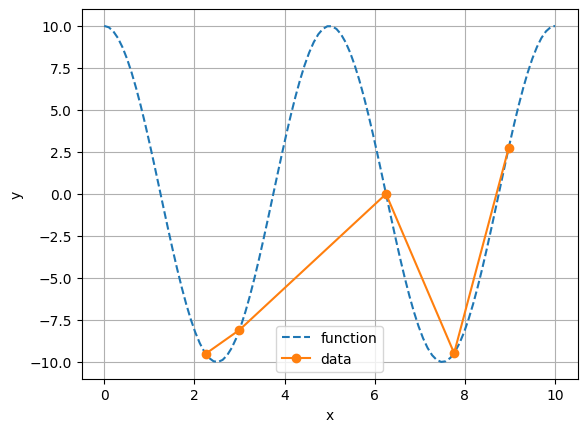

In [1]:
# Daten / Messpunkte
import numpy as np
import matplotlib.pyplot as plt

x_func = np.linspace(0, 10, 100)
y_func = 10 * np.cos(2 * np.pi * x_func / 5)

n = 5
rng = np.random.default_rng(7)
x_data = np.round(np.sort(rng.uniform(low=0, high=10, size=n)), 2)
y_data = np.round(10 * np.cos(2 * np.pi * x_data / 5), 2)


plt.plot(x_func, y_func, '--', label="function")
plt.plot(x_data, y_data, 'o-', label="data")
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Interpolationspolynom mit Wolfram|Alpha

Die Abfrage muss folgende Form haben:

```
interpolatin ((x1, y1), (x2, y2), ..., (xn, yn))
```

In [2]:
print("interpolate", tuple(zip(x_data, y_data)))

interpolate ((2.25, -9.51), (3.0, -8.09), (6.25, 0.0), (7.76, -9.47), (8.97, 2.73))


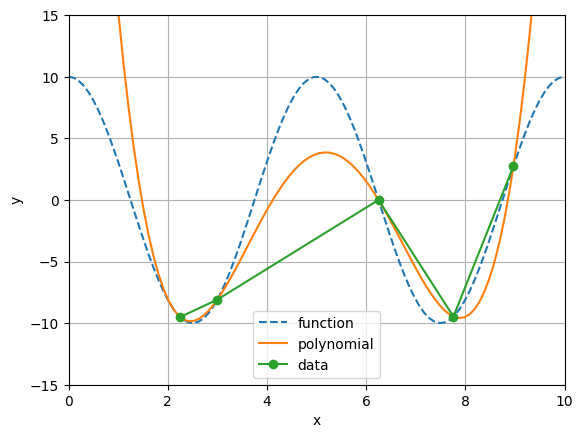

In [3]:
def poly(x):
    # return -0.0473365*x**4 + 0.952326*x**3 - 5.3204*x**2 + 5.40659*x + 6.6953
    return 0.249477*x**4 - 5.16599*x**3 + 36.4345*x**2 - 100.289*x + 84.1405

y_poly = poly(x_func)


plt.plot(x_func, y_func, '--', label="function")
plt.plot(x_func, y_poly, '-', label="polynomial")
plt.plot(x_data, y_data, 'o-', label="data")
plt.xlim(0, 10)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Lineare Interpolation

Schritte

1. Index der benachbarten Datenpunkte suchen: [`np.searchsorted()`](https://numpy.org/doc/stable/reference/generated/numpy.searchsorted.html)
2. Lineare Interpolation mithilfe der benachbarten Datenpunkte konstruieren

$$ y = \frac{y_i - y_{i-1}}{x_i-x_{i-1}}\cdot \left(x - x_{i-1}\right) + y_{i-1} $$

In [4]:
def lin_interp(x):
    n = len(x_data)
    i_upper = np.searchsorted(x_data, x)
    i_upper = np.where(i_upper < n, i_upper, n - 1)
    i_upper = np.where(i_upper > 1, i_upper, 1)
    i_lower = i_upper - 1
    x_upper = x_data[i_upper]
    y_upper = y_data[i_upper]
    x_lower = x_data[i_lower]
    y_lower = y_data[i_lower]
    return (y_upper - y_lower) / (x_upper - x_lower) * (x - x_lower) + y_lower

In [5]:
y_lin_interp = lin_interp(x_func)
# y_lin_interp


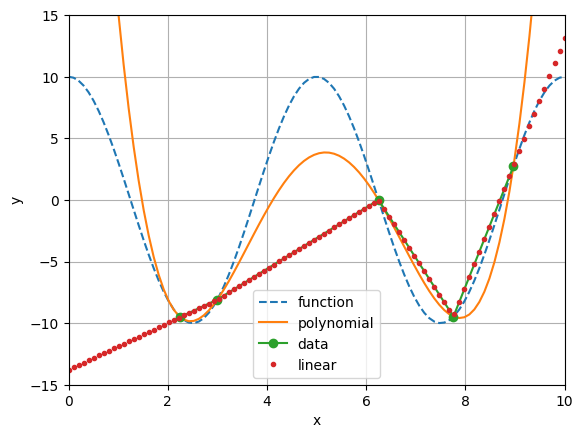

In [6]:
plt.plot(x_func, y_func, '--', label="function")
plt.plot(x_func, y_poly, '-', label="polynomial")
plt.plot(x_data, y_data, 'o-', label="data")
plt.plot(x_func, y_lin_interp, '.', label="linear")
plt.xlim(0, 10)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Interpolation mit SciPy

- Übersicht zu Interpolation mit SciPy [`scipy.interpolate`](https://docs.scipy.org/doc/scipy/reference/interpolate.html).
- Die Funktion [`scipy.interpolate.interp1d`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.interp1d.html) ist der wesentliche Einstiegspunkt.
    - `kind = "quadratic"` und `"cubic"` ergeben eine Spline-Interpolation, bei der die Datenpunkte (Stützstellen) stückweise mithilfe von quadratischen bzw. kubischen Polynomen interpoliert werden, wobei jeweis an jeder Stützstelle die erste Ableitung bzw. die erste und die zweite Ableitung übereinstimmen muss, siehe z.B. ["Spline-Interpolation", Wikipedia](https://de.wikipedia.org/wiki/Spline-Interpolation).

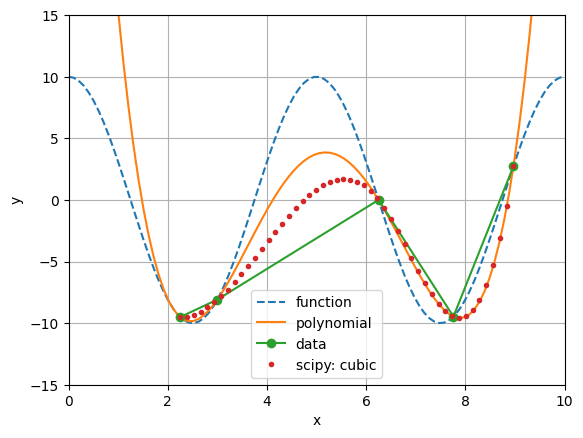

In [7]:
from scipy import interpolate

kind = "cubic"
interpolating_func = interpolate.interp1d(x_data, y_data, kind=kind)

x = np.linspace(x_data.min(), x_data.max())
y = interpolating_func(x)

plt.plot(x_func, y_func, '--', label="function")
plt.plot(x_func, y_poly, '-', label="polynomial")
plt.plot(x_data, y_data, 'o-', label="data")
plt.plot(x, y, '.', label=f"scipy: {kind}")
plt.xlim(0, 10)
plt.ylim(-15, 15)
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend()
plt.show()

### Interpolation mit SciPy in 2 Dimensionen

Hier schauen wir uns die Funktion [`scipy.interpolate.griddata`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html) an und das Beispiel, das dort zu finden ist.

Hier wird statt `np.meshgrid` die Funktion [`np.mgrid`](https://numpy.org/doc/stable/reference/generated/numpy.mgrid.html) verwendet. `np.mgrid` erzeugt die Koordinatenmatrizen direkt statt wie `np.meshrid` als Input die Koordinatenvektoren zu banutzen.

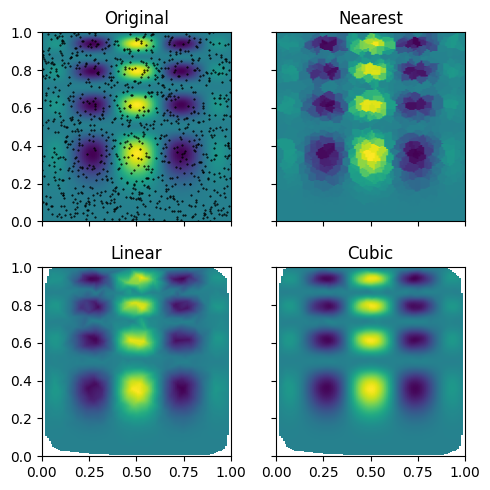

In [14]:
from scipy.interpolate import griddata
import matplotlib.pyplot as plt

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(5,5))
ax1.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
ax1.plot(points[:,0], points[:,1], 'k.', ms=1)
ax1.set_title('Original')
ax2.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
ax2.set_title('Nearest')
ax3.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
ax3.set_title('Linear')
ax4.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
ax4.set_title('Cubic')
plt.tight_layout()
plt.show()
